# TF2.0--基础CNN网络

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-alpha0


## 1. 构造数据

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


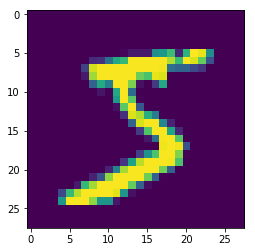

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

## 2. 构造网络

In [11]:
model = keras.Sequential()

In [14]:
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                       filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'))
#关于same和valid    https://blog.csdn.net/syyyy712/article/details/80272071

In [15]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy']
             )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                147488    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 157,386
Trainable params: 157,386
Non-trainable params: 0
__________________________________________________

## 3. 模型训练


In [18]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 39s 715us/sample - loss: 0.3362 - accuracy: 0.9169 - val_loss: 0.0710 - val_accuracy: 0.9788
Epoch 2/5
54000/54000 [==============================] - 39s 716us/sample - loss: 0.0732 - accuracy: 0.9787 - val_loss: 0.0616 - val_accuracy: 0.9832
Epoch 3/5
54000/54000 [==============================] - 37s 681us/sample - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0564 - val_accuracy: 0.9852
Epoch 4/5
54000/54000 [==============================] - 37s 681us/sample - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0695 - val_accuracy: 0.9832
Epoch 5/5
54000/54000 [==============================] - 39s 714us/sample - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0721 - val_accuracy: 0.9840


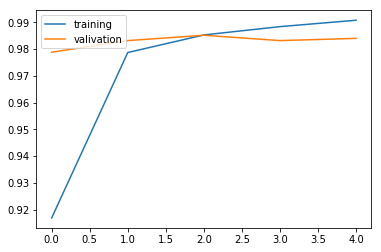

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [20]:
res = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 152us/sample - loss: 0.0559 - accuracy: 0.9836
